In [13]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential

In [14]:
df = pd.read_csv('diabetes.csv')

In [15]:
len(df)

768

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Visualisation

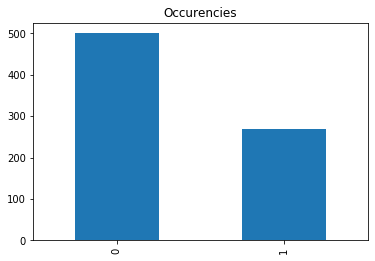

In [18]:
df.Outcome.value_counts().plot.bar()
plt.title('Occurencies')
plt.show()

## Feature engineering

In [19]:
df.loc[df['BMI'] <= 18.5, 'BMI_group'] = 'underweight'
df.loc[(df['BMI'] > 18.5) & (df['BMI'] <= 24.9), 'BMI_group'] = 'healthy'
df.loc[(df['BMI'] > 25) & (df['BMI'] <= 29.9), 'BMI_group'] = 'overweight'
df.loc[(df['BMI'] > 30) & (df['BMI'] <= 30.9), 'BMI_group'] = 'obese'

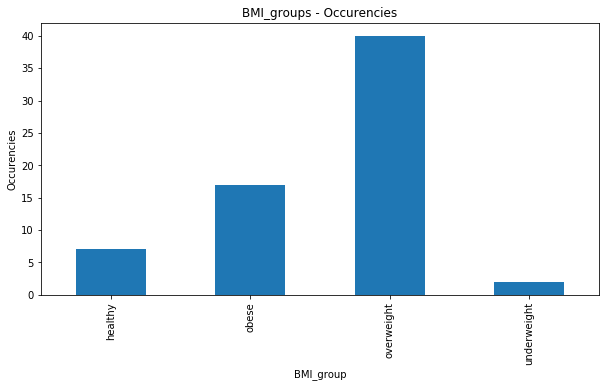

In [20]:
figure = plt.figure(figsize=(10,5))
df.groupby(['BMI_group'])['Outcome'].sum().plot.bar()
plt.xlabel('BMI_group')
plt.ylabel('Occurencies')
plt.title('BMI_groups - Occurencies')
plt.show()

In [21]:
df.loc[(df['Age'] >=21) & (df['Age'] <30), 'Age_group'] = '20s'
df.loc[(df['Age'] >=30) & (df['Age'] <40), 'Age_group'] = '30s'  
df.loc[(df['Age'] >=40) & (df['Age'] <50), 'Age_group'] = '40s'  
df.loc[(df['Age'] >=50) & (df['Age'] <60), 'Age_group'] = '50s'  
df.loc[df['Age'] >=60, 'Age_group'] = '60s +'  

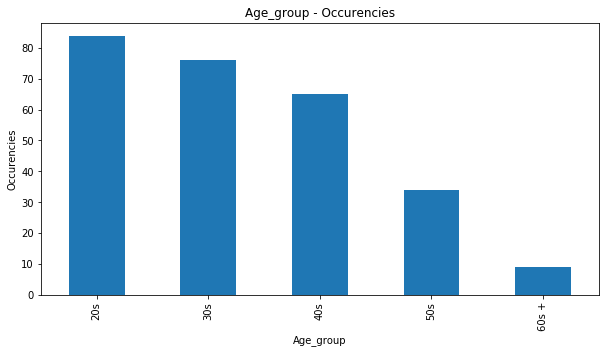

In [22]:
figure = plt.figure(figsize=(10,5))
df.groupby(['Age_group'])['Outcome'].sum().plot.bar()
plt.xlabel('Age_group')
plt.ylabel('Occurencies')
plt.title('Age_group - Occurencies')
plt.show()

In [23]:
df.loc[(df['BloodPressure'] <60), 'BloodPressure_group'] = 'Low'
df.loc[(df['BloodPressure'] >= 60) & (df['BloodPressure'] < 80), 'BloodPressure_group'] = 'Normal'
df.loc[(df['BloodPressure'] >= 80) & (df['BloodPressure'] < 90), 'BloodPressure_group'] = 'Prehypertension'
df.loc[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 110), 'BloodPressure_group'] = 'High'

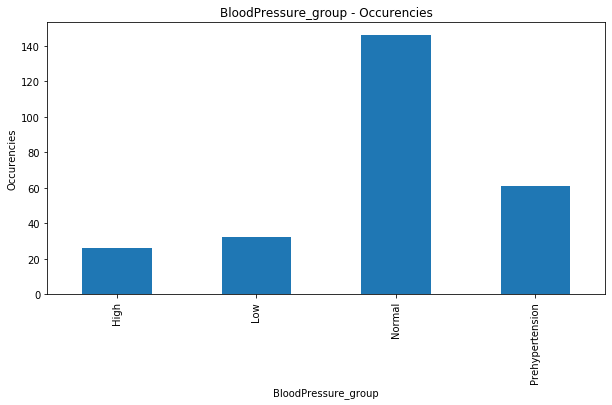

In [24]:
figure = plt.figure(figsize=(10,5))
df.groupby(['BloodPressure_group'])['Outcome'].sum().plot.bar()
plt.xlabel('BloodPressure_group')
plt.ylabel('Occurencies')
plt.title('BloodPressure_group - Occurencies')
plt.show()

In [25]:
df.loc[df['Glucose'] <115, 'Glucose_group'] = 'Excellent'
df.loc[(df['Glucose'] >=115) & (df['Glucose'] <180), 'Glucose_group'] = 'Good'
df.loc[(df['Glucose'] >= 180), 'Glucose_group'] = 'Poor'

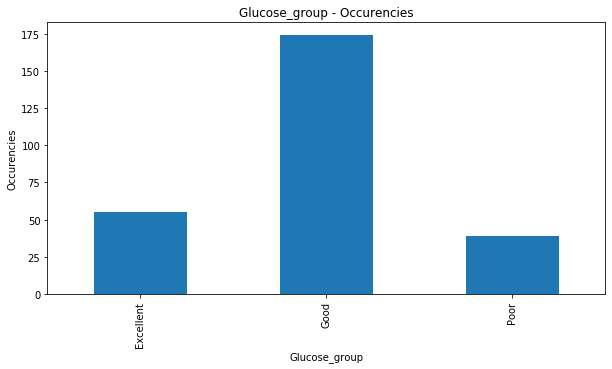

In [26]:
figure = plt.figure(figsize=(10,5))
df.groupby(['Glucose_group'])['Outcome'].sum().plot.bar()
plt.xlabel('Glucose_group')
plt.ylabel('Occurencies')
plt.title('Glucose_group - Occurencies')
plt.show()

<Figure size 720x720 with 0 Axes>

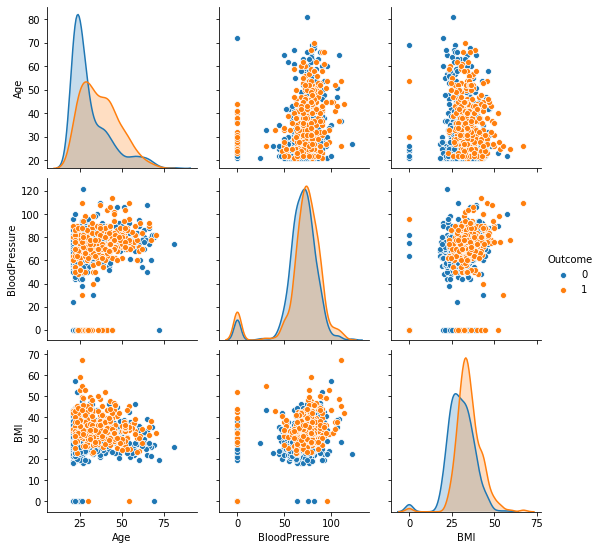

In [27]:
figure = plt.figure(figsize=(10,10))
sns.pairplot(df, vars = ('Age', 'BloodPressure', 'BMI'), hue='Outcome')
plt.show()

##  Feature correlation

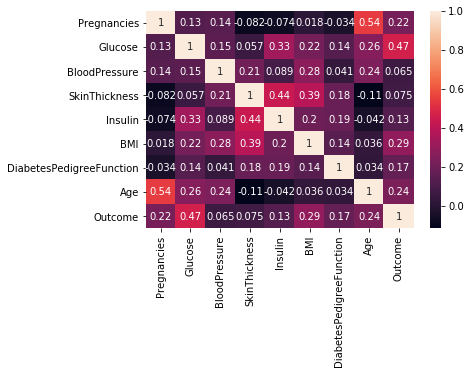

In [28]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Feature importance

In [29]:
df1 = pd.get_dummies(df)

In [30]:
X = df1.drop(['Outcome'], axis = 1)
y = df1.Outcome

In [31]:
X.shape, y.shape

((768, 24), (768,))

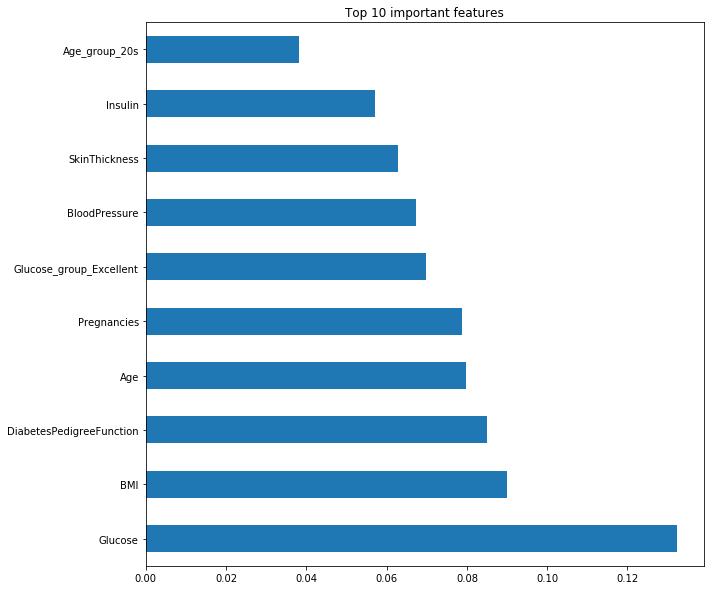

In [32]:
model = ExtraTreesClassifier(n_estimators = 100, random_state = 42)
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(figsize=(10,10), kind='barh')
plt.title('Top 10 important features')

plt.show()

# Kfold

In [33]:
clf = LogisticRegression(random_state=0, max_iter=3500)

In [34]:
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

skf = StratifiedKFold(n_splits = 10, shuffle=True)
scoresSKF2 = cross_validate (clf, X, y , cv = skf, scoring=scoring)

In [35]:
scoresSKF2['test_f1_macro'].mean()

0.7313480289815818

In [36]:
scoresSKF2['test_precision_macro'].mean()

0.7520746292257333

In [37]:
scoresSKF2['test_recall_macro'].mean()

0.7236068376068375

# Models

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((514, 24), (254, 24), (514,), (254,))

### Logistic Regression

In [24]:
clf = LogisticRegression(random_state=0, max_iter=2500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.64      0.63      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



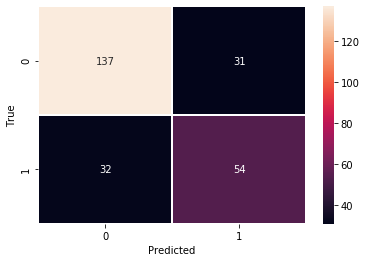

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1.0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### XGBoost Classifier

In [27]:
xgb_cl = xgb.XGBClassifier(random_state = 42)
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.58      0.65      0.61        86

    accuracy                           0.72       254
   macro avg       0.69      0.70      0.70       254
weighted avg       0.73      0.72      0.72       254



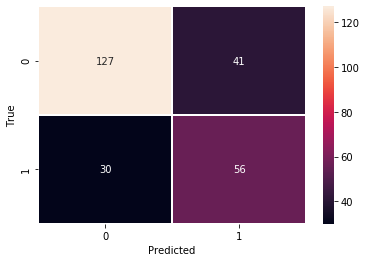

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1.0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### ANN 

In [41]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [42]:
model = Sequential()
model.add(Dense(8, input_dim = X_train.shape[-1], activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = METRICS)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 5, verbose = 2, validation_split = 0.3)

Instructions for updating:
Use tf.cast instead.
Train on 359 samples, validate on 155 samples
Epoch 1/200
 - 1s - loss: 8.9302 - tp: 115.0000 - fp: 207.0000 - tn: 28.0000 - fn: 9.0000 - accuracy: 0.3983 - precision: 0.3571 - recall: 0.9274 - auc: 0.5282 - val_loss: 9.9847 - val_tp: 57.0000 - val_fp: 97.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.3677 - val_precision: 0.3701 - val_recall: 0.9828 - val_auc: 0.4964
Epoch 2/200
 - 0s - loss: 8.6627 - tp: 115.0000 - fp: 210.0000 - tn: 25.0000 - fn: 9.0000 - accuracy: 0.3900 - precision: 0.3538 - recall: 0.9274 - auc: 0.5317 - val_loss: 9.8889 - val_tp: 57.0000 - val_fp: 96.0000 - val_tn: 1.0000 - val_fn: 1.0000 - val_accuracy: 0.3742 - val_precision: 0.3725 - val_recall: 0.9828 - val_auc: 0.5016
Epoch 3/200
 - 0s - loss: 7.7391 - tp: 105.0000 - fp: 185.0000 - tn: 50.0000 - fn: 19.0000 - accuracy: 0.4318 - precision: 0.3621 - recall: 0.8468 - auc: 0.5389 - val_loss: 9.1739 - val_tp: 57.0000 - val_fp: 94.0000 - val_tn: 3.0000

Epoch 25/200
 - 0s - loss: 0.6728 - tp: 3.0000 - fp: 5.0000 - tn: 230.0000 - fn: 121.0000 - accuracy: 0.6490 - precision: 0.3750 - recall: 0.0242 - auc: 0.5737 - val_loss: 0.7339 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 97.0000 - val_fn: 57.0000 - val_accuracy: 0.6323 - val_precision: 1.0000 - val_recall: 0.0172 - val_auc: 0.6472
Epoch 26/200
 - 0s - loss: 0.6627 - tp: 11.0000 - fp: 6.0000 - tn: 229.0000 - fn: 113.0000 - accuracy: 0.6685 - precision: 0.6471 - recall: 0.0887 - auc: 0.6137 - val_loss: 0.7288 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 95.0000 - val_fn: 56.0000 - val_accuracy: 0.6258 - val_precision: 0.5000 - val_recall: 0.0345 - val_auc: 0.6635
Epoch 27/200
 - 0s - loss: 0.6720 - tp: 11.0000 - fp: 12.0000 - tn: 223.0000 - fn: 113.0000 - accuracy: 0.6518 - precision: 0.4783 - recall: 0.0887 - auc: 0.5628 - val_loss: 0.7273 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 95.0000 - val_fn: 56.0000 - val_accuracy: 0.6258 - val_precision: 0.5000 - val_recall: 0.0345 - val_

Epoch 50/200
 - 0s - loss: 0.6520 - tp: 19.0000 - fp: 12.0000 - tn: 223.0000 - fn: 105.0000 - accuracy: 0.6741 - precision: 0.6129 - recall: 0.1532 - auc: 0.6298 - val_loss: 0.7088 - val_tp: 5.0000 - val_fp: 1.0000 - val_tn: 96.0000 - val_fn: 53.0000 - val_accuracy: 0.6516 - val_precision: 0.8333 - val_recall: 0.0862 - val_auc: 0.7177
Epoch 51/200
 - 0s - loss: 0.6461 - tp: 29.0000 - fp: 19.0000 - tn: 216.0000 - fn: 95.0000 - accuracy: 0.6825 - precision: 0.6042 - recall: 0.2339 - auc: 0.6310 - val_loss: 0.7014 - val_tp: 8.0000 - val_fp: 2.0000 - val_tn: 95.0000 - val_fn: 50.0000 - val_accuracy: 0.6645 - val_precision: 0.8000 - val_recall: 0.1379 - val_auc: 0.7216
Epoch 52/200
 - 0s - loss: 0.6382 - tp: 38.0000 - fp: 23.0000 - tn: 212.0000 - fn: 86.0000 - accuracy: 0.6964 - precision: 0.6230 - recall: 0.3065 - auc: 0.6522 - val_loss: 0.7021 - val_tp: 6.0000 - val_fp: 1.0000 - val_tn: 96.0000 - val_fn: 52.0000 - val_accuracy: 0.6581 - val_precision: 0.8571 - val_recall: 0.1034 - val_auc

Epoch 75/200
 - 0s - loss: 0.6474 - tp: 34.0000 - fp: 21.0000 - tn: 214.0000 - fn: 90.0000 - accuracy: 0.6908 - precision: 0.6182 - recall: 0.2742 - auc: 0.6213 - val_loss: 0.6789 - val_tp: 8.0000 - val_fp: 2.0000 - val_tn: 95.0000 - val_fn: 50.0000 - val_accuracy: 0.6645 - val_precision: 0.8000 - val_recall: 0.1379 - val_auc: 0.7662
Epoch 76/200
 - 0s - loss: 0.6089 - tp: 49.0000 - fp: 22.0000 - tn: 213.0000 - fn: 75.0000 - accuracy: 0.7298 - precision: 0.6901 - recall: 0.3952 - auc: 0.7088 - val_loss: 0.6621 - val_tp: 25.0000 - val_fp: 10.0000 - val_tn: 87.0000 - val_fn: 33.0000 - val_accuracy: 0.7226 - val_precision: 0.7143 - val_recall: 0.4310 - val_auc: 0.7785
Epoch 77/200
 - 0s - loss: 0.6089 - tp: 55.0000 - fp: 28.0000 - tn: 207.0000 - fn: 69.0000 - accuracy: 0.7298 - precision: 0.6627 - recall: 0.4435 - auc: 0.6984 - val_loss: 0.6672 - val_tp: 21.0000 - val_fp: 8.0000 - val_tn: 89.0000 - val_fn: 37.0000 - val_accuracy: 0.7097 - val_precision: 0.7241 - val_recall: 0.3621 - val_a

Epoch 100/200
 - 0s - loss: 0.6052 - tp: 48.0000 - fp: 22.0000 - tn: 213.0000 - fn: 76.0000 - accuracy: 0.7270 - precision: 0.6857 - recall: 0.3871 - auc: 0.6842 - val_loss: 0.6514 - val_tp: 23.0000 - val_fp: 8.0000 - val_tn: 89.0000 - val_fn: 35.0000 - val_accuracy: 0.7226 - val_precision: 0.7419 - val_recall: 0.3966 - val_auc: 0.7733
Epoch 101/200
 - 0s - loss: 0.6006 - tp: 56.0000 - fp: 27.0000 - tn: 208.0000 - fn: 68.0000 - accuracy: 0.7354 - precision: 0.6747 - recall: 0.4516 - auc: 0.7001 - val_loss: 0.6467 - val_tp: 28.0000 - val_fp: 10.0000 - val_tn: 87.0000 - val_fn: 30.0000 - val_accuracy: 0.7419 - val_precision: 0.7368 - val_recall: 0.4828 - val_auc: 0.7848
Epoch 102/200
 - 0s - loss: 0.5908 - tp: 49.0000 - fp: 24.0000 - tn: 211.0000 - fn: 75.0000 - accuracy: 0.7242 - precision: 0.6712 - recall: 0.3952 - auc: 0.7119 - val_loss: 0.6479 - val_tp: 26.0000 - val_fp: 9.0000 - val_tn: 88.0000 - val_fn: 32.0000 - val_accuracy: 0.7355 - val_precision: 0.7429 - val_recall: 0.4483 - v

Epoch 125/200
 - 0s - loss: 0.5771 - tp: 52.0000 - fp: 20.0000 - tn: 215.0000 - fn: 72.0000 - accuracy: 0.7437 - precision: 0.7222 - recall: 0.4194 - auc: 0.7134 - val_loss: 0.6358 - val_tp: 24.0000 - val_fp: 8.0000 - val_tn: 89.0000 - val_fn: 34.0000 - val_accuracy: 0.7290 - val_precision: 0.7500 - val_recall: 0.4138 - val_auc: 0.7732
Epoch 126/200
 - 0s - loss: 0.5744 - tp: 55.0000 - fp: 18.0000 - tn: 217.0000 - fn: 69.0000 - accuracy: 0.7577 - precision: 0.7534 - recall: 0.4435 - auc: 0.7486 - val_loss: 0.6176 - val_tp: 32.0000 - val_fp: 12.0000 - val_tn: 85.0000 - val_fn: 26.0000 - val_accuracy: 0.7548 - val_precision: 0.7273 - val_recall: 0.5517 - val_auc: 0.7993
Epoch 127/200
 - 0s - loss: 0.5694 - tp: 60.0000 - fp: 25.0000 - tn: 210.0000 - fn: 64.0000 - accuracy: 0.7521 - precision: 0.7059 - recall: 0.4839 - auc: 0.7346 - val_loss: 0.6245 - val_tp: 27.0000 - val_fp: 9.0000 - val_tn: 88.0000 - val_fn: 31.0000 - val_accuracy: 0.7419 - val_precision: 0.7500 - val_recall: 0.4655 - v

Epoch 150/200
 - 0s - loss: 0.5505 - tp: 61.0000 - fp: 18.0000 - tn: 217.0000 - fn: 63.0000 - accuracy: 0.7744 - precision: 0.7722 - recall: 0.4919 - auc: 0.7582 - val_loss: 0.6152 - val_tp: 35.0000 - val_fp: 17.0000 - val_tn: 80.0000 - val_fn: 23.0000 - val_accuracy: 0.7419 - val_precision: 0.6731 - val_recall: 0.6034 - val_auc: 0.7960
Epoch 151/200
 - 0s - loss: 0.5507 - tp: 59.0000 - fp: 17.0000 - tn: 218.0000 - fn: 65.0000 - accuracy: 0.7716 - precision: 0.7763 - recall: 0.4758 - auc: 0.7478 - val_loss: 0.6185 - val_tp: 32.0000 - val_fp: 12.0000 - val_tn: 85.0000 - val_fn: 26.0000 - val_accuracy: 0.7548 - val_precision: 0.7273 - val_recall: 0.5517 - val_auc: 0.7913
Epoch 152/200
 - 0s - loss: 0.5655 - tp: 56.0000 - fp: 19.0000 - tn: 216.0000 - fn: 68.0000 - accuracy: 0.7577 - precision: 0.7467 - recall: 0.4516 - auc: 0.7323 - val_loss: 0.6238 - val_tp: 30.0000 - val_fp: 12.0000 - val_tn: 85.0000 - val_fn: 28.0000 - val_accuracy: 0.7419 - val_precision: 0.7143 - val_recall: 0.5172 -

Epoch 175/200
 - 0s - loss: 0.5379 - tp: 59.0000 - fp: 17.0000 - tn: 218.0000 - fn: 65.0000 - accuracy: 0.7716 - precision: 0.7763 - recall: 0.4758 - auc: 0.7723 - val_loss: 0.6327 - val_tp: 26.0000 - val_fp: 7.0000 - val_tn: 90.0000 - val_fn: 32.0000 - val_accuracy: 0.7484 - val_precision: 0.7879 - val_recall: 0.4483 - val_auc: 0.7808
Epoch 176/200
 - 0s - loss: 0.5674 - tp: 49.0000 - fp: 16.0000 - tn: 219.0000 - fn: 75.0000 - accuracy: 0.7465 - precision: 0.7538 - recall: 0.3952 - auc: 0.7409 - val_loss: 0.6166 - val_tp: 29.0000 - val_fp: 12.0000 - val_tn: 85.0000 - val_fn: 29.0000 - val_accuracy: 0.7355 - val_precision: 0.7073 - val_recall: 0.5000 - val_auc: 0.7857
Epoch 177/200
 - 0s - loss: 0.5384 - tp: 60.0000 - fp: 21.0000 - tn: 214.0000 - fn: 64.0000 - accuracy: 0.7632 - precision: 0.7407 - recall: 0.4839 - auc: 0.7778 - val_loss: 0.6124 - val_tp: 36.0000 - val_fp: 19.0000 - val_tn: 78.0000 - val_fn: 22.0000 - val_accuracy: 0.7355 - val_precision: 0.6545 - val_recall: 0.6207 - 

Epoch 200/200
 - 0s - loss: 0.5266 - tp: 59.0000 - fp: 16.0000 - tn: 219.0000 - fn: 65.0000 - accuracy: 0.7744 - precision: 0.7867 - recall: 0.4758 - auc: 0.7749 - val_loss: 0.6002 - val_tp: 34.0000 - val_fp: 18.0000 - val_tn: 79.0000 - val_fn: 24.0000 - val_accuracy: 0.7290 - val_precision: 0.6538 - val_recall: 0.5862 - val_auc: 0.7962


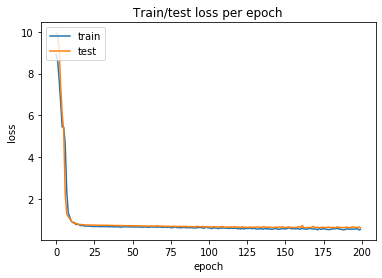

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train/test loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
results = model.evaluate(X_test, y_test)
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

254/254 [==============================] - 0s 35us/step
loss :  0.559871680623903
tp :  53.0
fp :  27.0
tn :  141.0
fn :  33.0
accuracy :  0.7637795209884644
precision :  0.6625000238418579
recall :  0.6162790656089783
auc :  0.7785160541534424
